#part 1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
train_images_1d = train_images.reshape(train_images.shape[0], -1)
test_images_1d = test_images.reshape(test_images.shape[0], -1)

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images_1d.shape, test_images_1d.shape, train_labels.shape, test_labels.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [ ]:
def custom_initializer(shape, dtype=None):
  initial_weights = tf.keras.initializers.HeNormal()(shape, dtype=dtype)
  return initial_weights

In [ ]:
model_baseline_p1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784)),
    tf.keras.layers.Dense(1024,activation='relu', kernel_initializer=custom_initializer),
    tf.keras.layers.Dense(1024,activation='relu', kernel_initializer=custom_initializer),
    tf.keras.layers.Dense(1024,activation='relu', kernel_initializer=custom_initializer),
    tf.keras.layers.Dense(1024,activation='relu', kernel_initializer=custom_initializer),
    tf.keras.layers.Dense(1024,activation='relu', kernel_initializer=custom_initializer),
    tf.keras.layers.Dense(10,activation='softmax')
  ])

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer_fn = tf.keras.optimizers.Adam(learning_rate=0.001)


In [ ]:
model_baseline_p1.compile(optimizer=optimizer_fn, loss=loss_fn, metrics=['accuracy'])

In [ ]:
epochs = 50
history_baseline_p1 = model_baseline_p1.fit(train_images_1d, train_labels, epochs=epochs,batch_size = 256)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


235/235 [==============================] - 6s 4ms/step - loss: 0.2448 - accuracy: 0.9237
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0838 - accuracy: 0.9748
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0567 - accuracy: 0.9825
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0417 - accuracy: 0.9869
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0348 - accuracy: 0.9892
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0273 - accuracy: 0.9915
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0314 - accuracy: 0.9911
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0250 - accuracy: 0.9924
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0201 - accuracy: 0.9941
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0192 - accuracy: 0.9941
Epoch 11/5

In [ ]:
model_baseline_p1.evaluate(test_images_1d, test_labels, batch_size=256)


40/40 [==============================] - 0s 3ms/step - loss: 0.1262 - accuracy: 0.9846


[0.1262107640504837, 0.9846000075340271]

In [ ]:
len(model_baseline_p1.get_weights())

12

In [ ]:
model_baseline_p1.save_weights('model_baseline_p1_weights.h5')

In [ ]:
model_baseline_p1.load_weights('/content/model_baseline_p1_weights.h5')

In [ ]:
z=0
for layer in model_baseline_p1.layers:
    weights = layer.get_weights()

    if weights:
        for i, w in enumerate(weights):
            print(z)
            z=z+1
            print(f"Shape of weights {i} for layer {model_baseline_p1.layers.index(layer)}: {w.shape}")
    else:
        print(f"No weights for layer {model_baseline_p1.layers.index(layer)}")



0
Shape of weights 0 for layer 0: (784, 1024)
1
Shape of weights 1 for layer 0: (1024,)
2
Shape of weights 0 for layer 1: (1024, 1024)
3
Shape of weights 1 for layer 1: (1024,)
4
Shape of weights 0 for layer 2: (1024, 1024)
5
Shape of weights 1 for layer 2: (1024,)
6
Shape of weights 0 for layer 3: (1024, 1024)
7
Shape of weights 1 for layer 3: (1024,)
8
Shape of weights 0 for layer 4: (1024, 1024)
9
Shape of weights 1 for layer 4: (1024,)
10
Shape of weights 0 for layer 5: (1024, 10)
11
Shape of weights 1 for layer 5: (10,)


In [ ]:
model_baseline_p1_weights = model_baseline_p1.get_weights()
len(model_baseline_p1_weights)

12

In [ ]:
for i in range(len(model_baseline_p1_weights)):
    print(f"Weights of layer {i+1}: {model_baseline_p1_weights[i].shape}")


Weights of layer 1: (784, 1024)
Weights of layer 2: (1024,)
Weights of layer 3: (1024, 1024)
Weights of layer 4: (1024,)
Weights of layer 5: (1024, 1024)
Weights of layer 6: (1024,)
Weights of layer 7: (1024, 1024)
Weights of layer 8: (1024,)
Weights of layer 9: (1024, 1024)
Weights of layer 10: (1024,)
Weights of layer 11: (1024, 10)
Weights of layer 12: (10,)


In [ ]:
for i in range(0,len(model_baseline_p1_weights),2):
    print(i)
    print(f"Weights of layer {i}: {model_baseline_p1_weights[i].shape}")



0
Weights of layer 0: (784, 1024)
2
Weights of layer 2: (1024, 1024)
4
Weights of layer 4: (1024, 1024)
6
Weights of layer 6: (1024, 1024)
8
Weights of layer 8: (1024, 1024)
10
Weights of layer 10: (1024, 10)


In [ ]:
len(model_baseline_p1_weights)

12

In [ ]:
def random_v2(D):
  model_baseline_p1_weights = model_baseline_p1.get_weights()
  tmp_weights = []
  # print(type(D))
  for i in range(0,12,2):
    # print(i)
    # print(i+1)
    s, u, v = tf.linalg.svd(model_baseline_p1.get_weights()[i])
    s= tf.linalg.diag(s)
    u_new = u[:,:D]
    s_new = s[:D,:D]
    v_new = v[:,:D]
    weights_new = tf.matmul(u_new,tf.matmul(s_new,v_new,adjoint_b=True))
    # even layers -weights
    tmp_weights.append(model_baseline_p1_weights[i] if i == 10 else weights_new)
    tmp_weights.append(model_baseline_p1_weights[i+1])
  # for i in range(1,12,2):
  #   tmp_bias.append(model_baseline_p1_weights[i+1])
  # print(len(tmp_weights))
  # for i in range(0,len(tmp_weights)):
  #   print(f"Weights of layer {i+1}: {tmp_weights[i].shape}")
  model_baseline_p1.set_weights(tmp_weights)
  return model_baseline_p1.evaluate(test_images_1d, test_labels)

In [ ]:
tmp_acc = []

In [ ]:
model_baseline_p1.load_weights('/content/model_baseline_p1_weights.h5')
tmp_acc.append(random_v2(10)[1])

313/313 [==============================] - 1s 2ms/step - loss: 1.7898 - accuracy: 0.5930


In [ ]:
model_baseline_p1.load_weights('/content/model_baseline_p1_weights.h5')
tmp_acc.append(random_v2(20)[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.4137 - accuracy: 0.8810


In [ ]:
model_baseline_p1.load_weights('/content/model_baseline_p1_weights.h5')
tmp_acc.append(random_v2(50)[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0943 - accuracy: 0.9824


In [ ]:
model_baseline_p1.load_weights('/content/model_baseline_p1_weights.h5')
tmp_acc.append(random_v2(100)[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1010 - accuracy: 0.9855


In [ ]:
model_baseline_p1.load_weights('/content/model_baseline_p1_weights.h5')
tmp_acc.append(random_v2(200)[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1099 - accuracy: 0.9851


In [ ]:
model_baseline_p1.load_weights('/content/model_baseline_p1_weights.h5')
tmp_acc.append(random_v2(784)[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1256 - accuracy: 0.9846


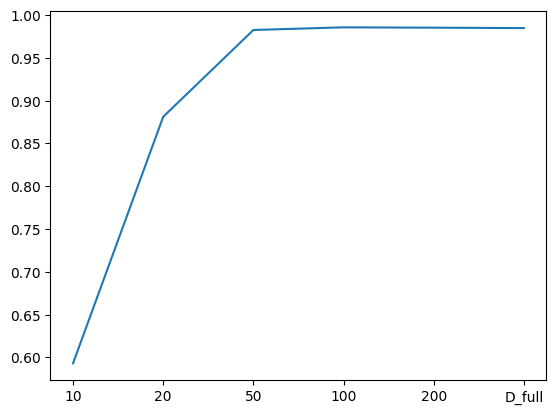

In [ ]:
plt.plot([10,20,50,100,200,'D_full'],tmp_acc)

#part 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
train_images_1d = train_images.reshape(train_images.shape[0], -1)
test_images_1d = test_images.reshape(test_images.shape[0], -1)

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images_1d.shape, test_images_1d.shape, train_labels.shape, test_labels.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [ ]:
def custom_initializer(shape, dtype=None):
  initial_weights = tf.keras.initializers.HeNormal()(shape, dtype=dtype)
  return initial_weights

In [ ]:
model_baseline_p2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784)),
    tf.keras.layers.Dense(1024,activation='relu', kernel_initializer=custom_initializer),
    tf.keras.layers.Dense(1024,activation='relu', kernel_initializer=custom_initializer),
    tf.keras.layers.Dense(1024,activation='relu', kernel_initializer=custom_initializer),
    tf.keras.layers.Dense(1024,activation='relu', kernel_initializer=custom_initializer),
    tf.keras.layers.Dense(1024,activation='relu', kernel_initializer=custom_initializer),
    tf.keras.layers.Dense(10,activation='softmax')
  ])

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer_fn = tf.keras.optimizers.Adam()


In [ ]:
model_baseline_p2.compile(optimizer=optimizer_fn, loss=loss_fn, metrics=['accuracy'])

In [ ]:
from tqdm import tqdm

epochs = 50

history_baseline_p2 = []
for epoch in tqdm(range(epochs), desc="Training Progress"):
    history = model_baseline_p2.fit(train_images_1d, train_labels, epochs=1, batch_size=256, verbose=0)
    history_baseline_p2.append(history)


In [ ]:
model_baseline_p2.load_weights('/content/model_baseline_p2_weights.h5')

In [ ]:
model_baseline_p2_weights = model_baseline_p2.get_weights()

In [ ]:
# ref: https://www.geeksforgeeks.org/appending-a-dictionary-to-a-list-in-python/#
def random_v3(D):
  model_baseline_p2_weights = model_baseline_p2.get_weights()
  tmp_weights = []
  # print(type(D))
  for i in range(0,12,2):
    # print(i)
    # print(i+1)
    s, u, v = tf.linalg.svd(model_baseline_p2.get_weights()[i])
    s= tf.linalg.diag(s)
    u_new = u[:,:D]
    s_new = s[:D,:D]
    v_new = v[:,:D]
    weights_new = {'key1': u_new, 'key2': tf.matmul(s_new, v_new, adjoint_b=True)}
    # layers -weights
    tmp_weights.append(model_baseline_p2_weights[i] if i == 10 else weights_new)
    # layers -bias
    tmp_weights.append(model_baseline_p2_weights[i+1])
  # # updating weights of the model
  # model_baseline_p1.set_weights(tmp_weights)
  # # returning the accuracy of the model
  # return model_baseline_p1.evaluate(test_images_1d, test_labels)
  return tmp_weights

In [ ]:
updated_weights = random_v3(20)

In [ ]:
updated_weights_final = []
for item in updated_weights:
    if isinstance(item, dict):
        updated_weights_final.append(item['key1'])
        updated_weights_final.append(tf.zeros(20))
        updated_weights_final.append(item['key2'])
        print(f"The shape of U is {item['key1'].shape}")
        print(f"The shape of middle layer is {20}")
        print(f"The shape of V is {item['key2'].shape}")
    else:
        updated_weights_final.append(item)
        print(f"The shape of normal weights is  {item.shape}")


The shape of V is (784, 20)
The shape of V is (20, 1024)
The shape of normal weights is  (1024,)
The shape of V is (1024, 20)
The shape of V is (20, 1024)
The shape of normal weights is  (1024,)
The shape of V is (1024, 20)
The shape of V is (20, 1024)
The shape of normal weights is  (1024,)
The shape of V is (1024, 20)
The shape of V is (20, 1024)
The shape of normal weights is  (1024,)
The shape of V is (1024, 20)
The shape of V is (20, 1024)
The shape of normal weights is  (1024,)
The shape of normal weights is  (1024, 10)
The shape of normal weights is  (10,)


In [ ]:
def custom_initializer(shape, dtype=None):
  initial_weights = tf.keras.initializers.HeNormal()(shape, dtype=dtype)
  return initial_weights
model_baseline_p2_modified = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784)),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1024,activation='relu', kernel_initializer=custom_initializer),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1024,activation='relu', kernel_initializer=custom_initializer),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1024,activation='relu', kernel_initializer=custom_initializer),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1024,activation='relu', kernel_initializer=custom_initializer),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1024,activation='relu', kernel_initializer=custom_initializer),
    tf.keras.layers.Dense(10,activation='softmax')
  ])
model_baseline_p2_modified.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 20)                15700     
                                                                 
 dense_40 (Dense)            (None, 1024)              21504     
                                                                 
 dense_41 (Dense)            (None, 20)                20500     
                                                                 
 dense_42 (Dense)            (None, 1024)              21504     
                                                                 
 dense_43 (Dense)            (None, 20)                20500     
                                                                 
 dense_44 (Dense)            (None, 1024)              21504     
                                                                 
 dense_45 (Dense)            (None, 20)               

In [ ]:
model_baseline_p2_modified.set_weights(updated_weights_final)

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer_fn = tf.keras.optimizers.Adam(learning_rate= 0.000001)

In [ ]:
model_baseline_p2_modified.compile(optimizer=optimizer_fn, loss=loss_fn, metrics=['accuracy'])

In [ ]:
history_model_baseline_p2_modified = model_baseline_p2_modified.fit(train_images_1d, train_labels, epochs=epochs,batch_size = 512)

Epoch 1/50
118/118 [==============================] - 8s 67ms/step - loss: 0.3188 - accuracy: 0.9154
Epoch 2/50
118/118 [==============================] - 6s 49ms/step - loss: 0.2948 - accuracy: 0.9218
Epoch 3/50
118/118 [==============================] - 5s 45ms/step - loss: 0.2730 - accuracy: 0.9288
Epoch 4/50
118/118 [==============================] - 8s 70ms/step - loss: 0.2534 - accuracy: 0.9346
Epoch 5/50
118/118 [==============================] - 8s 64ms/step - loss: 0.2359 - accuracy: 0.9391
Epoch 6/50
118/118 [==============================] - 6s 47ms/step - loss: 0.2209 - accuracy: 0.9435
Epoch 7/50
118/118 [==============================] - 8s 64ms/step - loss: 0.2081 - accuracy: 0.9473
Epoch 8/50
118/118 [==============================] - 5s 42ms/step - loss: 0.1972 - accuracy: 0.9503
Epoch 9/50
118/118 [==============================] - 8s 65ms/step - loss: 0.1881 - accuracy: 0.9525
Epoch 10/50
118/118 [==============================] - 7s 55ms/step - loss: 0.1805 - accura

In [ ]:
model_baseline_p2_modified.evaluate(test_images_1d, test_labels, batch_size=256)[1]*100

40/40 [==============================] - 1s 16ms/step - loss: 0.1421 - accuracy: 0.9654


96.5399980545044

In [ ]:
# Accuracy jumped from from 91 to 97 percent.

#part 3


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
train_images_1d = train_images.reshape(train_images.shape[0], -1)
test_images_1d = test_images.reshape(test_images.shape[0], -1)

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images_1d.shape, test_images_1d.shape, train_labels.shape, test_labels.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [ ]:
def custom_initializer(shape, dtype=None):
  initial_weights = tf.keras.initializers.HeNormal()(shape, dtype=dtype)
  return initial_weights

In [ ]:
model_baseline_p3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784)),
    tf.keras.layers.Dense(1024,activation='relu', kernel_initializer=custom_initializer),
    tf.keras.layers.Dense(1024,activation='relu', kernel_initializer=custom_initializer),
    tf.keras.layers.Dense(1024,activation='relu', kernel_initializer=custom_initializer),
    tf.keras.layers.Dense(1024,activation='relu', kernel_initializer=custom_initializer),
    tf.keras.layers.Dense(1024,activation='relu', kernel_initializer=custom_initializer),
    tf.keras.layers.Dense(10,activation='softmax')
  ])

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer_fn = tf.keras.optimizers.Adam(learning_rate=0.001)


In [ ]:
model_baseline_p3.compile(optimizer=optimizer_fn, loss=loss_fn, metrics=['accuracy'])

In [ ]:
from tqdm import tqdm

epochs = 50

history_baseline_p3 = []
for epoch in tqdm(range(epochs), desc="Training Progress"):
    history = model_baseline_p3.fit(train_images_1d, train_labels, epochs=1, batch_size=256, verbose=0)
    history_baseline_p3.append(history)


Training Progress:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
Training Progress: 100%|██████████| 50/50 [01:15<00:00,  1.50s/it]


In [ ]:
model_baseline_p3.save_weights('model_baseline_p3_weights.h5')

In [ ]:
model_baseline_p3.load_weights('/content/model_baseline_p2_weights.h5')

In [ ]:
#ref: https://www.youtube.com/watch?v=n-PgCuD2DNg&list=PL1cO-IW9gs1agWeimC9h0wZqRbskWXOUL&index=12&ab_channel=OnePageCode https://www.tensorflow.org/guide/keras/making_new_layers_and_models_via_subclassing%20https://www.tensorflow.org/api_docs/python/tf/custom_gradient
# i ahve used to code for custom layer by learning from the video above
class MyDenseLayer(tf.keras.layers.Layer):
  def __init__(self, num_outputs):
    super(MyDenseLayer, self).__init__()
    self.num_outputs = num_outputs
  def build(self, input_shape):
    self.kernel = self.add_weight("kernel", shape=[int(input_shape[-1]), self.num_outputs])
    self.bias = self.add_weight("bias", shape = [self.num_outputs,])
  def call(self, inputs):
    # updated weight code here to call it to next layer
    W_new = quantize(self.kernel)
    return tf.keras.activations.relu(tf.matmul(inputs, W_new) + self.bias)

In [ ]:
#ref : https://stackoverflow.com/questions/60864049/how-to-backprop-for-custom-quantization-in-tensorflow-2-0
@tf.custom_gradient
def quantize(x):
  s, u, v = tf.linalg.svd(x)
  x_new = tf.matmul(tf.matmul(u[:,0:20],tf.linalg.diag(s[0:20])),v[:,0:20],transpose_b=True)
  def grad(dy):
    return dy
  return x_new, grad

In [ ]:
model_baseline_p3_modified = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784)),
    MyDenseLayer(1024),
    MyDenseLayer(1024),
    MyDenseLayer(1024),
    MyDenseLayer(1024),
    MyDenseLayer(1024),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [ ]:
model_baseline_p3_modified.set_weights(model_baseline_p3.get_weights())

In [ ]:
model_baseline_p3_modified.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epochs = 20
history_model_baseline_p3_modified = model_baseline_p3_modified.fit(train_images_1d, train_labels, epochs=epochs,batch_size = 2048)

Epoch 1/20
30/30 [==============================] - 41s 1s/step - loss: 0.1187 - accuracy: 0.9688
Epoch 2/20
30/30 [==============================] - 41s 1s/step - loss: 0.0707 - accuracy: 0.9785
Epoch 3/20
30/30 [==============================] - 41s 1s/step - loss: 0.0546 - accuracy: 0.9826
Epoch 4/20
30/30 [==============================] - 40s 1s/step - loss: 0.0516 - accuracy: 0.9836
Epoch 5/20
30/30 [==============================] - 41s 1s/step - loss: 0.0484 - accuracy: 0.9851
Epoch 6/20
30/30 [==============================] - 41s 1s/step - loss: 0.0402 - accuracy: 0.9869
Epoch 7/20
30/30 [==============================] - 41s 1s/step - loss: 0.0390 - accuracy: 0.9875
Epoch 8/20
30/30 [==============================] - 41s 1s/step - loss: 0.0361 - accuracy: 0.9882
Epoch 9/20
30/30 [==============================] - 41s 1s/step - loss: 0.0427 - accuracy: 0.9865
Epoch 10/20
30/30 [==============================] - 41s 1s/step - loss: 0.0374 - accuracy: 0.9880
Epoch 11/20
30/30 [

In [ ]:
model_baseline_p3_modified.evaluate(test_images_1d, test_labels, batch_size=256)


40/40 [==============================] - 54s 1s/step - loss: 0.0964 - accuracy: 0.9796


[0.09638117998838425, 0.9796000123023987]

In [ ]:
model_baseline_p3_modified.save_weights('/content/model_baseline_p3_modified_weights.h5')


#Part 4

In [ ]:
import pickle
with open('/content/drive/MyDrive/dlsw3/trs.pkl', 'rb') as f:
  training_data = pickle.load(f)
with open('/content/drive/MyDrive/dlsw3/tes.pkl', 'rb') as f:
  testing_data = pickle.load(f)

In [ ]:
import librosa
import itertools
import numpy as np
import random

In [ ]:
def apply_stft(data):
    return np.abs(librosa.stft(data, n_fft=1024, hop_length=512)).T
def generate_mini_batch(i, data):
    positive_pairs = []
    negative_pairs = []
    tmp_data1 = data[:i*10] + data[i*10+10:]
    tmp_data2 = data[i*10:i*10+10]
    positive_pairs = [[apply_stft(tmp_data2[x]), apply_stft(tmp_data2[y])] for x, y in itertools.combinations(range(10), 2)]
    negative_pairs = [[apply_stft(i[0]), apply_stft(i[1])] for i in random.choices(list(itertools.product(tmp_data1, tmp_data2)), k=45)]
    return positive_pairs + negative_pairs
def get_labels_mini_batch(i):
    return np.concatenate((np.ones((i, 45), dtype=int), np.zeros((i, 45), dtype=int)), axis=1).flatten()

In [ ]:
training_data_modified = []
for x in range(0,50):
  training_data_modified.extend(generate_mini_batch(x,list(training_data)))
testing_data_modified = []
for x in range(0,20):
  testing_data_modified.extend(generate_mini_batch(x,list(testing_data)))

In [ ]:
training_labels = get_labels_mini_batch(50)

In [ ]:
testing_labels  = get_labels_mini_batch(20)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
def create_siamese_model(input_shape):
    input_a = tf.keras.Input(shape=input_shape)
    input_b = tf.keras.Input(shape=input_shape)
    tmp_model_lstm = tf.keras.Sequential([
        layers.LSTM(128, return_sequences=True),
        layers.LSTM(64)
    ])
    processed_a = tmp_model_lstm(input_a)
    processed_b = tmp_model_lstm(input_b)
    dot_product = tf.keras.layers.Dot(axes=1, normalize=True)([processed_a, processed_b])
    output = layers.Dense(1, activation='sigmoid')(dot_product)
    siamese_model = models.Model(inputs=[input_a, input_b], outputs=output)
    return siamese_model
input_shape = (None, 513)
siamese_model = create_siamese_model(input_shape)
siamese_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
siamese_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_13 (InputLayer)       [(None, None, 513)]          0         []                            
                                                                                                  
 input_14 (InputLayer)       [(None, None, 513)]          0         []                            
                                                                                                  
 sequential_6 (Sequential)   (None, 64)                   378112    ['input_13[0][0]',            
                                                                     'input_14[0][0]']            
                                                                                                  
 dot_5 (Dot)                 (None, 1)                    0         ['sequential_6[0][0]',  

In [ ]:
siamese_model.fit([np.stack(training_data_modified)[:, 0], np.stack(training_data_modified)[:, 1]], training_labels, batch_size=32, epochs=30)

Epoch 1/30
141/141 [==============================] - 7s 10ms/step - loss: 0.5743 - accuracy: 0.7147
Epoch 2/30
141/141 [==============================] - 2s 11ms/step - loss: 0.4890 - accuracy: 0.8071
Epoch 3/30
141/141 [==============================] - 1s 10ms/step - loss: 0.4510 - accuracy: 0.8422
Epoch 4/30
141/141 [==============================] - 1s 10ms/step - loss: 0.4153 - accuracy: 0.8689
Epoch 5/30
141/141 [==============================] - 1s 10ms/step - loss: 0.3976 - accuracy: 0.8853
Epoch 6/30
141/141 [==============================] - 1s 10ms/step - loss: 0.3611 - accuracy: 0.9073
Epoch 7/30
141/141 [==============================] - 1s 10ms/step - loss: 0.3398 - accuracy: 0.9220
Epoch 8/30
141/141 [==============================] - 1s 10ms/step - loss: 0.3189 - accuracy: 0.9322
Epoch 9/30
141/141 [==============================] - 1s 10ms/step - loss: 0.2978 - accuracy: 0.9413
Epoch 10/30
141/141 [==============================] - 1s 10ms/step - loss: 0.2862 - accura

In [ ]:
siamese_model.evaluate([np.stack(testing_data_modified)[:, 0], np.stack(testing_data_modified)[:, 1]] ,testing_labels,batch_size=32,verbose=0)

[0.5503755211830139, 0.7427777647972107]

the accuract on test set is 74%

#part 5


In [1]:
import zipfile
import os
import pandas as pd
import librosa
import numpy as np
import os
# ref : https://stackoverflow.com/questions/66494366/what-is-the-difference-between-np-array-and-np-stack-applied-to-a-list-of-images

In [2]:
with zipfile.ZipFile('/content/drive/MyDrive/dlsw3/homework3.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [3]:
import os
import librosa
import numpy as np
def preprocess_and_get_max_col(train_loc, tr_lis):
    max_col = 0
    for file_name in tr_lis:
        s, sr = librosa.load(train_loc + file_name, sr=None)
        x = np.abs(librosa.stft(s, n_fft=1024, hop_length=512))
        max_col = max(max_col, x.shape[1])
    return max_col
train_loc = "/content/timit-homework/tr/"
tr = os.listdir(train_loc)
val_loc = "/content/timit-homework/v/"
v = os.listdir(val_loc)
test_loc = "/content/timit-homework/te/"
te = os.listdir(test_loc)

max_col = preprocess_and_get_max_col(train_loc, tr)
print("Maximum value of the training column number:", max_col)
max_col = preprocess_and_get_max_col(val_loc, v)
print("Maximum value of the validating column number:", max_col)
max_col = preprocess_and_get_max_col(test_loc, te)
print("Maximum value of the testing column number:", max_col)


Maximum value of the training column number: 178
Maximum value of the validating column number: 178
Maximum value of the testing column number: 195


as you can see the data size variers for multiple different video there are 2 approaches we can take one being the mini batch size of same data input or you can use padding with max size of as that is the maximum number of data point above that for testing is 195 so i am just padding the data with 200


In [4]:
def random_v4(location1):
    # clean signal - trs
    # noise signal - trn
    # combi signal - trx
    x = []
    loco = os.listdir(location1)
    loco.sort()
    def preprocessing_audio(location):
#          print(0)
          import librosa
          s, sr = librosa.load(location, sr=None)
          poco = np.abs(librosa.stft(s, n_fft=1024, hop_length=512))
          tmp_value = np.full((513, 200), 0.0)
          tmp_value[:, 0:poco.shape[1]] = poco
          tmp_value = np.transpose(tmp_value)
          return tmp_value
    for i in range(0,len(loco)):
          x.append(preprocessing_audio(location1+loco[i]))
    return x

In [5]:
#train_data_S=train_data_N=train_data_X=[],[],[]
train_data_location = '/content/timit-homework/tr/'
#train_data_N=train_data_S=train_data_X=random_v4(train_data_location)
z = random_v4(train_data_location)
train_data_N = z[:1200]
train_data_S = z[1200:2400]
train_data_X = z[2400:]

In [6]:
# validating_data_S=validating_data_N=validating_data_X=[],[],[]
validating_data_location ='/content/timit-homework/v/'
z = random_v4(validating_data_location)
validating_data_N= z[:1200]
validating_data_S= z[1200:2400]
validating_data_X= z[2400:]

In [7]:
testing_data_location = '/content/timit-homework/te/'
testing_data_X = random_v4(testing_data_location)

In [8]:
train_data_ibm = [np.where(train_data_S[i] > train_data_N[i], 1, 0) for i in range(1200)]

In [9]:
validation_data_ibm = [np.where(validating_data_S[i] > validating_data_N[i], 1, 0) for i in range(1200)]

In [10]:
import tensorflow as tf

model_p5 = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=513,activation='tanh',return_sequences=True),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.LSTM(units=600,activation='tanh',return_sequences=True),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(units=513,activation='sigmoid',kernel_initializer=tf.keras.initializers.GlorotNormal())
  ])
model_p5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss='mean_squared_error',)


In [11]:
history_p5 = model_p5.fit(np.stack(train_data_X),
                    np.stack(train_data_ibm),
                    batch_size=10,epochs=50,verbose=True)


Epoch 1/50
120/120 [==============================] - 13s 32ms/step - loss: 0.1135
Epoch 2/50
120/120 [==============================] - 4s 31ms/step - loss: 0.0827
Epoch 3/50
120/120 [==============================] - 4s 31ms/step - loss: 0.0759
Epoch 4/50
120/120 [==============================] - 4s 31ms/step - loss: 0.0747
Epoch 5/50
120/120 [==============================] - 4s 31ms/step - loss: 0.0716
Epoch 6/50
120/120 [==============================] - 4s 31ms/step - loss: 0.0687
Epoch 7/50
120/120 [==============================] - 4s 31ms/step - loss: 0.0671
Epoch 8/50
120/120 [==============================] - 4s 31ms/step - loss: 0.0655
Epoch 9/50
120/120 [==============================] - 4s 31ms/step - loss: 0.0643
Epoch 10/50
120/120 [==============================] - 4s 31ms/step - loss: 0.0637
Epoch 11/50
120/120 [==============================] - 4s 31ms/step - loss: 0.0627
Epoch 12/50
120/120 [==============================] - 4s 31ms/step - loss: 0.0620
Epoch 13/50


In [12]:
model_p5.evaluate(np.stack(validating_data_X),np.stack(validation_data_ibm),verbose=True)

38/38 [==============================] - 2s 25ms/step - loss: 0.0585


0.05852806195616722

In [13]:
M = model_p5.predict(np.stack(validating_data_X))

38/38 [==============================] - 1s 22ms/step


In [14]:
reconstruction = np.multiply(M,np.stack(validating_data_X))

In [15]:
snr = []
for i in range(1200):
    tmp_snr =  10 * np.log10(np.sum(validating_data_S[i]**2) / np.sum((validating_data_S[i]-reconstruction[i])**2))
    snr.append(tmp_snr)

In [16]:
max(snr)

30.763073735631323

In [17]:
min(snr)

5.120294384421174

In [18]:
np.round(np.mean(snr, axis=0), 2)

12.61

In [19]:
M = model_p5.predict(np.stack(testing_data_X),batch_size=10)
reconstruction_test = np.multiply(M,np.stack(testing_data_X))
import soundfile as sf
loco = os.listdir(testing_data_location)
loco.sort()
loco_f = ["/content/timit-homework/te/" + element for element in loco]
for i in range(len(loco_f)):
    s,sr= librosa.load(loco_f[i], sr=None)
    test_reconstruction = librosa.istft(reconstruction_test[i].T, hop_length=512)[:len(s)]
    sf.write('/content/drive/MyDrive/dlsw3/reconstructed_sound/'+loco_f[i].rsplit('/', 1)[-1]+"_reconstructed.wav", test_reconstruction, sr)

40/40 [==============================] - 1s 13ms/step
